In [1]:
import numpy as np   #El tipo de dato
import matplotlib.pylab as plt # Gaficas

In [2]:
def Initial_conditions(Matrix):
    for i in range(1,N-1):
        for j in range(1,N-1):
            if i==int(N/4) and  j>=N/4 and j<=3*N/4:
                Matrix[i,j]=1
            if i==int(3*N/4) and  j>=N/4 and j<=3*N/4:
                Matrix[i,j]=-1

In [3]:
def Step(Matrix):
    Matrix2=Matrix.copy()
    for i in range(1,N-1):
        for j in range(1,N-1):
            if boundary(i,j):
                Matrix[i,j]=(Matrix2[i-1,j]+Matrix2[i+1,j]+Matrix2[i,j-1]+Matrix2[i,j+1])/4

In [4]:
def boundary(i1,j1):
    if (i1==int(N/4) and  j1>=N/4 and j1<=3*N/4) or (i1==int(3*N/4) and  j1>=N/4 and j1<=3*N/4):
        return False
    else:
        return True

In [5]:
N=50 #Tamano de la matriz en la que se piensa solucionar el problema
Matrix=np.array([[0.0]*N for i in range(N)])

In [6]:
Times=100
Initial_conditions(Matrix)
for i in range(Times):
    Step(Matrix)

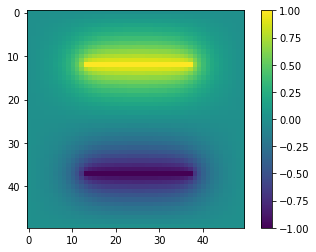

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111)
pl=ax.imshow(Matrix)
plt.colorbar(pl)